## Energy prediction notebook

In this notebook I will predict the energy usage in different kind of households based on various features. 

In [323]:
import os
import pandas as pd ## 2.1.0
import seaborn as sns ## 0.12.2
import matplotlib.pyplot as plt
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)


pandas version: 2.1.0
seaborn version: 0.12.2


#  Data provisioning

The first thing I noticed in my data is that the columns are not seperated and are all combined in 1 large string. 

In [324]:
file_path = os.path.join(os.path.expanduser("~"), "Downloads", "energyusagedataset.csv")
energyusagedataset = pd.read_csv(file_path)
energyusagedataset.head(10)

,"ID;""Woningtype"";""Gebruiksoppervlakte"";""Bouwjaar"";""Bewonersklasse"";""Hoofdverwarmingsinstallatie"";""Perioden"";""AandeelWoningenMetStadsverwarming_1"";""AandeelWoningenZonnestroomOpAdres_2"";""GemiddeldeAardgasleveringTempGecorr_3"";""GemiddeldeAardgasTempGecPerOpp_13"";""GemiddeldeElektriciteitslevering_23"";""GemElektriciteitsleveringPerBewoner_33"""
0,"0;""T001100"";""T001116"";""T001018"";""T001351"";""T00..."
1,"1;""T001100"";""T001116"";""T001018"";""T001351"";""T00..."
2,"2;""T001100"";""T001116"";""T001018"";""T001351"";""T00..."
3,"3;""T001100"";""T001116"";""T001018"";""T001351"";""A05..."
4,"4;""T001100"";""T001116"";""T001018"";""T001351"";""A05..."
5,"5;""T001100"";""T001116"";""T001018"";""T001351"";""A05..."
6,"6;""T001100"";""T001116"";""T001018"";""A043071"";""T00..."
7,"7;""T001100"";""T001116"";""T001018"";""A043071"";""T00..."
8,"8;""T001100"";""T001116"";""T001018"";""A043071"";""T00..."
9,"9;""T001100"";""T001116"";""T001018"";""A043071"";""A05..."


In [325]:

with open(file_path, 'r', encoding='utf-8') as file:
    first_line = file.readline()

columns = first_line.strip().split(';')
columns = [col.replace('\ufeff', '').strip('"') for col in columns]  

EnergyData = pd.read_csv(file_path, sep=';', skiprows=1, names=columns, encoding='utf-8')

columns_to_drop = ['Hoofdverwarmingsinstallatie', 'AandeelWoningenMetStadsverwarming_1', 'AandeelWoningenZonnestroomOpAdres_2',]  
EnergyData.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("Column names:")
print(list(EnergyData.columns))


print("\nSample 10 rows:")
print(EnergyData.head(10).to_string(index=False))






Column names:
['ID', 'Woningtype', 'Gebruiksoppervlakte', 'Bouwjaar', 'Bewonersklasse', 'Perioden', 'GemiddeldeAardgasleveringTempGecorr_3', 'GemiddeldeAardgasTempGecPerOpp_13', 'GemiddeldeElektriciteitslevering_23', 'GemElektriciteitsleveringPerBewoner_33']

Sample 10 rows:
 ID Woningtype Gebruiksoppervlakte Bouwjaar Bewonersklasse Perioden GemiddeldeAardgasleveringTempGecorr_3 GemiddeldeAardgasTempGecPerOpp_13 GemiddeldeElektriciteitslevering_23 GemElektriciteitsleveringPerBewoner_33
  0    T001100             T001116  T001018        T001351 2019JJ00                                  1240                              11.4                                2760                                   1410
  1    T001100             T001116  T001018        T001351 2020JJ00                                  1220                              11.4                                2770                                   1420
  2    T001100             T001116  T001018        T001351 2021JJ00            

### Data understanding
I notice that Woningtype gebruiksoppervlakte, bouwjaar, bewonersklasse,perioden dont have the correct values but have random codes that represent a name so I need to replace them with the correct values. In the preview tabel in the dataset it notes 7 different kind of Woningtypes(Totaal woningen,vrijstaande woningen,2-onder-1kap,Hoekwoning,Tussenwoning,Appartement,Onbekend).In the printed values we also see 7 different kind of types but then with different names. After looking at previews of the table when selecting the woningtypes 1 by 1 I can match the values to the names. this is the result T001100 is Totaal woningen / zw10320 = vrijstaande woning / zw10300 is 2-onder-1-kapwoning / zw25806 is hoekwoning / zw25805 is tussenwoning / zw25810 is appartement / zw25809 is onbekend. This repeats for the other categories asswell.

In [326]:
columns_to_analyze = EnergyData[['Woningtype']]

unique_value_counts = columns_to_analyze.apply(lambda col: col.value_counts())

print("Data Types of Selected Columns:")
print(EnergyData.dtypes)

print(unique_value_counts)
EnergyData['Woningtype'] = EnergyData['Woningtype'].replace('T001100', 'Totaal woningen')
EnergyData['Woningtype'] = EnergyData['Woningtype'].replace('ZW10320', 'vrijstaande woningen')
EnergyData['Woningtype'] = EnergyData['Woningtype'].replace('ZW10300', '2-onder-1-kapwoning')
EnergyData['Woningtype'] = EnergyData['Woningtype'].replace('ZW25806', 'hoekwoning')
EnergyData['Woningtype'] = EnergyData['Woningtype'].replace('ZW25805', 'tussenwoning')
EnergyData['Woningtype'] = EnergyData['Woningtype'].replace('ZW25810', 'appartement')
EnergyData['Woningtype'] = EnergyData['Woningtype'].replace('ZW25809', 'onbekend')
column_to_check = EnergyData['Woningtype']
checkvalue = column_to_check.value_counts()
print(checkvalue)

Data Types of Selected Columns:
ID                                         int64
Woningtype                                object
Gebruiksoppervlakte                       object
Bouwjaar                                  object
Bewonersklasse                            object
Perioden                                  object
GemiddeldeAardgasleveringTempGecorr_3     object
GemiddeldeAardgasTempGecPerOpp_13         object
GemiddeldeElektriciteitslevering_23       object
GemElektriciteitsleveringPerBewoner_33    object
dtype: object
            Woningtype
Woningtype            
T001100           3456
ZW10320           3456
ZW10300           3456
ZW25806           3456
ZW25805           3456
ZW25810           3456
ZW25809           3456
Woningtype
Totaal woningen         3456
vrijstaande woningen    3456
2-onder-1-kapwoning     3456
hoekwoning              3456
tussenwoning            3456
appartement             3456
onbekend                3456
Name: count, dtype: int64


In [327]:
columns_to_analyze = EnergyData[['Gebruiksoppervlakte']]

unique_value_counts = columns_to_analyze.apply(lambda col: col.value_counts())

print(unique_value_counts)
EnergyData['Gebruiksoppervlakte'] = EnergyData['Gebruiksoppervlakte'].replace('T001116', 'Totaal')
EnergyData['Gebruiksoppervlakte'] = EnergyData['Gebruiksoppervlakte'].replace('A050300', '2 tot 50 m² ')
EnergyData['Gebruiksoppervlakte'] = EnergyData['Gebruiksoppervlakte'].replace('A025408', '50 tot 75 m²')
EnergyData['Gebruiksoppervlakte'] = EnergyData['Gebruiksoppervlakte'].replace('A025409', '75 tot 100 m²')
EnergyData['Gebruiksoppervlakte'] = EnergyData['Gebruiksoppervlakte'].replace('A025410', '100 tot 150 m²')
EnergyData['Gebruiksoppervlakte'] = EnergyData['Gebruiksoppervlakte'].replace('A025411', '150 tot 250 m²')
EnergyData['Gebruiksoppervlakte'] = EnergyData['Gebruiksoppervlakte'].replace('A050301', '250 tot 10000 m²')
EnergyData['Gebruiksoppervlakte'] = EnergyData['Gebruiksoppervlakte'].replace('A025414', 'onbekend')
column_to_check = EnergyData['Gebruiksoppervlakte']
checkvalue = column_to_check.value_counts()
print(checkvalue)

                     Gebruiksoppervlakte
Gebruiksoppervlakte                     
T001116                             3024
A050300                             3024
A025408                             3024
A025409                             3024
A025410                             3024
A025411                             3024
A050301                             3024
A025414                             3024
Gebruiksoppervlakte
Totaal              3024
2 tot 50 m²         3024
50 tot 75 m²        3024
75 tot 100 m²       3024
100 tot 150 m²      3024
150 tot 250 m²      3024
250 tot 10000 m²    3024
onbekend            3024
Name: count, dtype: int64


In [328]:
columns_to_analyze = EnergyData[['Bouwjaar']]

unique_value_counts = columns_to_analyze.apply(lambda col: col.value_counts())

print(unique_value_counts)
EnergyData['Bouwjaar'] = EnergyData['Bouwjaar'].replace('T001018', 'Totaal')
EnergyData['Bouwjaar'] = EnergyData['Bouwjaar'].replace('ZW25799', '1000 / 1946')
EnergyData['Bouwjaar'] = EnergyData['Bouwjaar'].replace('ZW25800', '1946 / 1965')
EnergyData['Bouwjaar'] = EnergyData['Bouwjaar'].replace('ZW10406', '1965 / 1975')
EnergyData['Bouwjaar'] = EnergyData['Bouwjaar'].replace('ZW25801', '1975 / 1992')
EnergyData['Bouwjaar'] = EnergyData['Bouwjaar'].replace('ZW25815', '1992 / 2006')
EnergyData['Bouwjaar'] = EnergyData['Bouwjaar'].replace('ZW25818', '2006 / 2015')
EnergyData['Bouwjaar'] = EnergyData['Bouwjaar'].replace('ZW25797', '2015 / heden')
EnergyData['Bouwjaar'] = EnergyData['Bouwjaar'].replace('ZW25798', 'bouwjaar onbekend')
column_to_check = EnergyData['Bouwjaar']
checkvalue = column_to_check.value_counts()
print(checkvalue)

          Bouwjaar
Bouwjaar          
T001018       2688
ZW25799       2688
ZW25800       2688
ZW10406       2688
ZW25801       2688
ZW25815       2688
ZW25818       2688
ZW25797       2688
ZW25798       2688
Bouwjaar
Totaal               2688
1000 / 1946          2688
1946 / 1965          2688
1965 / 1975          2688
1975 / 1992          2688
1992 / 2006          2688
2006 / 2015          2688
2015 / heden         2688
bouwjaar onbekend    2688
Name: count, dtype: int64


In [329]:
columns_to_analyze = EnergyData[['Bewonersklasse']]

unique_value_counts = columns_to_analyze.apply(lambda col: col.value_counts())

print(unique_value_counts)
EnergyData['Bewonersklasse'] = EnergyData['Bewonersklasse'].replace('T001351', 'Totaal')
EnergyData['Bewonersklasse'] = EnergyData['Bewonersklasse'].replace('A043071', '0')
EnergyData['Bewonersklasse'] = EnergyData['Bewonersklasse'].replace('A043072', '1')
EnergyData['Bewonersklasse'] = EnergyData['Bewonersklasse'].replace('A043073', '2')
EnergyData['Bewonersklasse'] = EnergyData['Bewonersklasse'].replace('A043074', '3')
EnergyData['Bewonersklasse'] = EnergyData['Bewonersklasse'].replace('A043075', '4')
EnergyData['Bewonersklasse'] = EnergyData['Bewonersklasse'].replace('A043076', '5 of meer')
EnergyData['Bewonersklasse'] = EnergyData['Bewonersklasse'].replace('A043077', 'onbekend')
column_to_check = EnergyData['Bewonersklasse']
checkvalue = column_to_check.value_counts()
print(checkvalue)

                Bewonersklasse
Bewonersklasse                
T001351                   3024
A043071                   3024
A043072                   3024
A043073                   3024
A043074                   3024
A043075                   3024
A043076                   3024
A043077                   3024
Bewonersklasse
Totaal       3024
0            3024
1            3024
2            3024
3            3024
4            3024
5 of meer    3024
onbekend     3024
Name: count, dtype: int64


In [330]:
columns_to_analyze = EnergyData[['Perioden']]

unique_value_counts = columns_to_analyze.apply(lambda col: col.value_counts())

print(unique_value_counts)
EnergyData['Perioden'] = EnergyData['Perioden'].replace('2019JJ00', '2019')
EnergyData['Perioden'] = EnergyData['Perioden'].replace('2020JJ00', '2020')
EnergyData['Perioden'] = EnergyData['Perioden'].replace('2021JJ00', '2021')
column_to_check = EnergyData['Perioden']
checkvalue = column_to_check.value_counts()
print(checkvalue)

          Perioden
Perioden          
2019JJ00      8064
2020JJ00      8064
2021JJ00      8064
Perioden
2019    8064
2020    8064
2021    8064
Name: count, dtype: int64


In [331]:
EnergyData.head(10)

,ID,Woningtype,Gebruiksoppervlakte,Bouwjaar,Bewonersklasse,Perioden,GemiddeldeAardgasleveringTempGecorr_3,GemiddeldeAardgasTempGecPerOpp_13,GemiddeldeElektriciteitslevering_23,GemElektriciteitsleveringPerBewoner_33
0,0,Totaal woningen,Totaal,Totaal,Totaal,2019,1240,11.4,2760,1410
1,1,Totaal woningen,Totaal,Totaal,Totaal,2020,1220,11.4,2770,1420
2,2,Totaal woningen,Totaal,Totaal,Totaal,2021,1240,11.5,2810,1450
3,3,Totaal woningen,Totaal,Totaal,Totaal,2019,1320,12.0,2760,1410
4,4,Totaal woningen,Totaal,Totaal,Totaal,2020,1310,12.1,2770,1420
5,5,Totaal woningen,Totaal,Totaal,Totaal,2021,1330,12.1,2800,1430
6,6,Totaal woningen,Totaal,Totaal,0,2019,1120,12.0,1950,NaN
7,7,Totaal woningen,Totaal,Totaal,0,2020,1120,13.3,2040,NaN
8,8,Totaal woningen,Totaal,Totaal,0,2021,1110,13.0,2020,NaN
9,9,Totaal woningen,Totaal,Totaal,0,2019,1190,12.2,1940,NaN


In the preview tabel in the dataset it notes 7 different kind of Woningtypes(Totaal woningen,vrijstaande woningen,2-onder-1kap,Hoekwoning,Tussenwoning,Appartement,Onbekend).In the printed values we also see 7 different kind of types but then with different names. After looking at previews of the table when selecting the woningtypes 1 by 1 i can match the values to the names. this is the result T001100 is Totaal woningen / zw10320 = vrijstaande woning / zw10300 is 2-onder-1-kapwoning / zw25806 is hoekwoning / zw25805 is tussenwoning / zw25810 is appartement / zw25809 is onbekend



c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


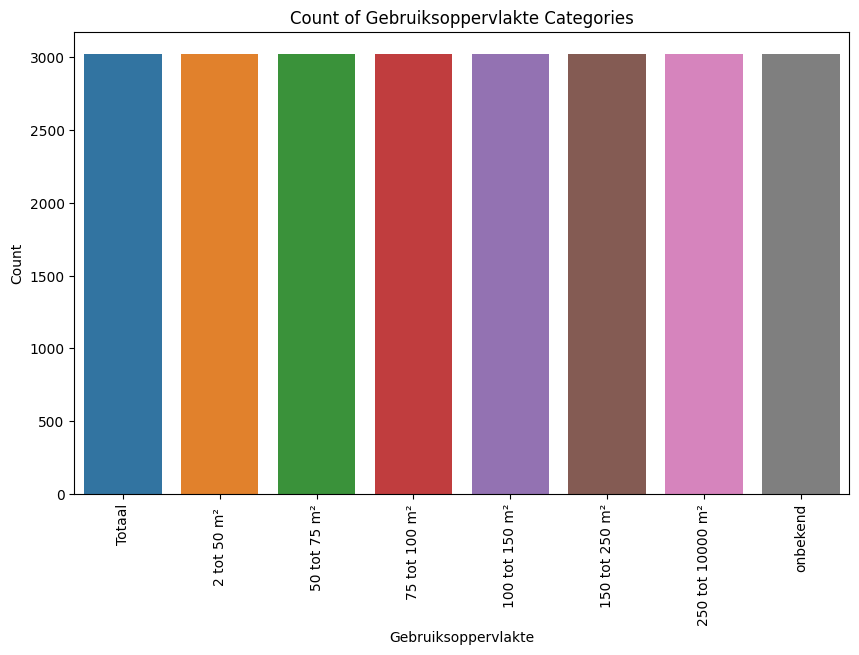

In [332]:

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Gebruiksoppervlakte', data=EnergyData)
plt.xticks(rotation=90)  
plt.xlabel('Gebruiksoppervlakte')
plt.ylabel('Count')
plt.title('Count of Gebruiksoppervlakte Categories')
plt.show()

We can see that the data is preprocessed because the count is equal for every feature except the values that we want to predict

## Feature selection
because we have some catergorical values that can't be converted to numerical i will be giving them an id like 0,1,2,3 to create a heatplot

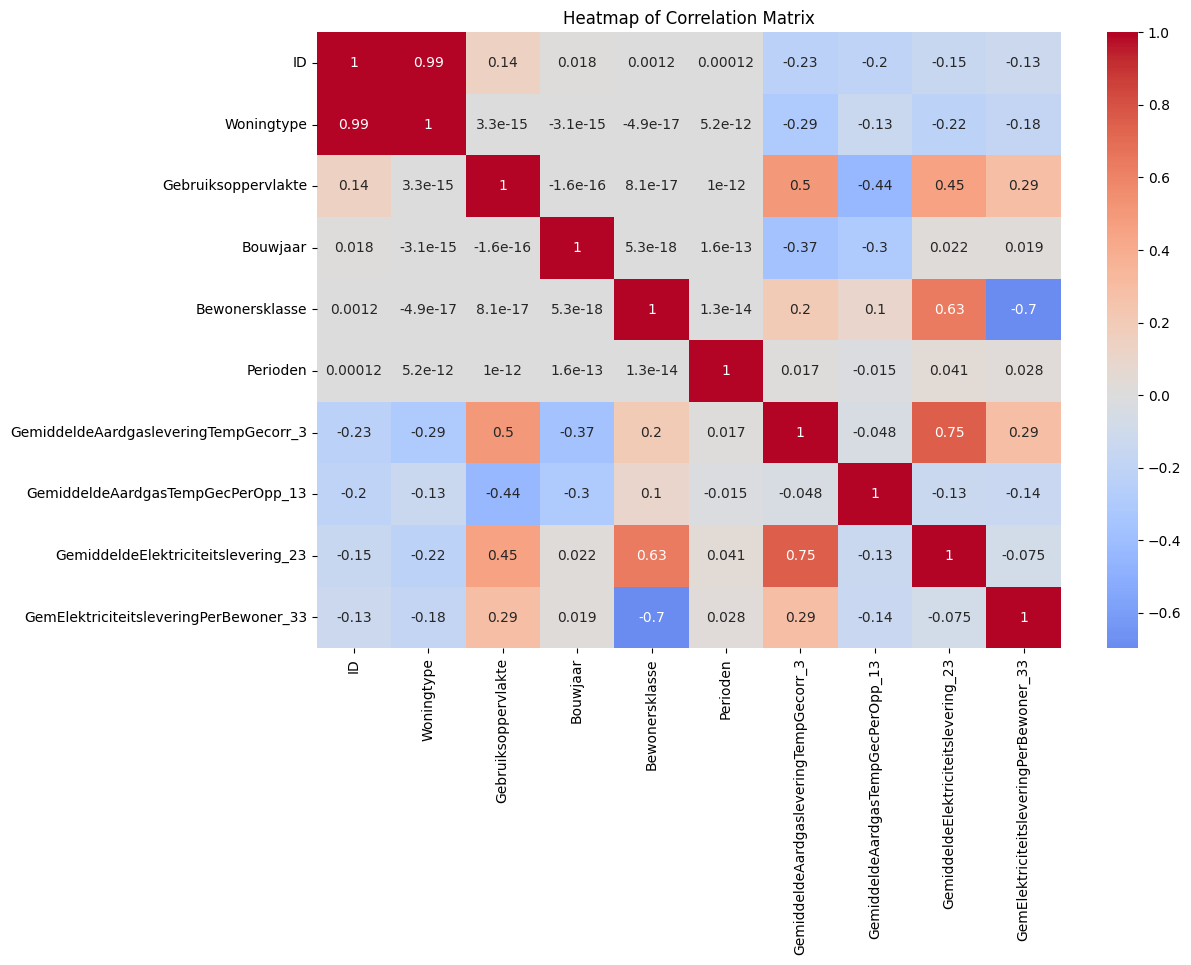

In [333]:
# Existing code
EnergyData_copy2 = EnergyData.copy()
columns_to_convert = ['Bewonersklasse', 'Perioden', 
                      'GemiddeldeAardgasleveringTempGecorr_3', 'GemiddeldeAardgasTempGecPerOpp_13', 
                      'GemiddeldeElektriciteitslevering_23', 'GemElektriciteitsleveringPerBewoner_33']

# Loop through each column and convert to numeric
for col in columns_to_convert:
    EnergyData_copy2[col] = pd.to_numeric(EnergyData_copy2[col], errors='coerce')

EnergyData_copy2['Woningtype'] = EnergyData_copy2['Woningtype'].replace('Totaal woningen', '0')
EnergyData_copy2['Woningtype'] = EnergyData_copy2['Woningtype'].replace('vrijstaande woningen', '1')
EnergyData_copy2['Woningtype'] = EnergyData_copy2['Woningtype'].replace('2-onder-1-kapwoning', '2')
EnergyData_copy2['Woningtype'] = EnergyData_copy2['Woningtype'].replace('hoekwoning', '3')
EnergyData_copy2['Woningtype'] = EnergyData_copy2['Woningtype'].replace('tussenwoning', '4')
EnergyData_copy2['Woningtype'] = EnergyData_copy2['Woningtype'].replace('appartement', '5')
EnergyData_copy2['Woningtype'] = EnergyData_copy2['Woningtype'].replace('onbekend', '6')  
EnergyData_copy2['Bouwjaar'] = EnergyData_copy2['Bouwjaar'].replace('Totaal', '0')
EnergyData_copy2['Bouwjaar'] = EnergyData_copy2['Bouwjaar'].replace('1000 / 1946', '1')
EnergyData_copy2['Bouwjaar'] = EnergyData_copy2['Bouwjaar'].replace('1946 / 1965', '2')
EnergyData_copy2['Bouwjaar'] = EnergyData_copy2['Bouwjaar'].replace('1965 / 1975', '3')
EnergyData_copy2['Bouwjaar'] = EnergyData_copy2['Bouwjaar'].replace('1975 / 1992', '4')
EnergyData_copy2['Bouwjaar'] = EnergyData_copy2['Bouwjaar'].replace('1992 / 2006', '5')
EnergyData_copy2['Bouwjaar'] = EnergyData_copy2['Bouwjaar'].replace('2006 / 2015', '6')
EnergyData_copy2['Bouwjaar'] = EnergyData_copy2['Bouwjaar'].replace('2015 / heden', '7')
EnergyData_copy2['Bouwjaar'] = EnergyData_copy2['Bouwjaar'].replace('bouwjaar onbekend', '8')  
EnergyData_copy2['Gebruiksoppervlakte'] = EnergyData_copy2['Gebruiksoppervlakte'].replace('Totaal', '0')
EnergyData_copy2['Gebruiksoppervlakte'] = EnergyData_copy2['Gebruiksoppervlakte'].replace('2 tot 50 m² ', '1')
EnergyData_copy2['Gebruiksoppervlakte'] = EnergyData_copy2['Gebruiksoppervlakte'].replace('50 tot 75 m²', '2')
EnergyData_copy2['Gebruiksoppervlakte'] = EnergyData_copy2['Gebruiksoppervlakte'].replace('75 tot 100 m²', '3')
EnergyData_copy2['Gebruiksoppervlakte'] = EnergyData_copy2['Gebruiksoppervlakte'].replace('100 tot 150 m²', '4')
EnergyData_copy2['Gebruiksoppervlakte'] = EnergyData_copy2['Gebruiksoppervlakte'].replace('150 tot 250 m²', '5')
EnergyData_copy2['Gebruiksoppervlakte'] = EnergyData_copy2['Gebruiksoppervlakte'].replace('250 tot 10000 m²', '6')
EnergyData_copy2['Gebruiksoppervlakte'] = EnergyData_copy2['Gebruiksoppervlakte'].replace('onbekend', '7')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(EnergyData_copy2.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()





since I am focussing on the GemiddeldeElektriciteitslevering I can see that Bewonersklasse / gemiddeldeaardgasleveringtempgecorr / gebruiksoppervlakte would be good features to use.